# import numpy as np

## Workshop: NumPy and Data Representation

NumPy Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

### Cheatsheet

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

More cheatsheets:
https://www.datacamp.com/community/data-science-cheatsheets?page=3

### References

1. https://docs.scipy.org/doc/numpy-dev/user/basics.types.html
2. Python Data Science Handbook by Jake VanderPlas
3. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney

### Installation

Windows: Start Button -> "Anaconda Prompt"

Ubuntu / MacOS: conda should be in your path

Activate the environment

```
conda activate module1
```

Install NumPy and Pandas

```
conda install numpy pandas
```

Tip: You can check the versions installed by calling Python with a script:
```
python -c "import numpy; print(numpy.__version__)"
```

### SGD to USD Exchange Rate Data

Instead of constructing sample arrays, we'll be using real data to play with numpy concepts. 

We'll use some data from data.gov.sg.

In [316]:
from IPython.display import IFrame

IFrame('https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual/resource/f927c39b-3b44-492e-8b54-174e775e0d98/view/43207b9f-1554-4afb-98fe-80dfdd6bb4f6', width=600, height=400)

### Download Instructions
1. Go to https://data.gov.sg/dataset/exchange-rates-sgd-per-unit-of-usd-average-for-period-annual
2. Click on the `Download` button
3. Unzip and extract the `.csv` file. Note the path for use below.

### Read the CSV

We'll be using a little bit of Pandas to read the CSV files.

Pandas will be covered in more detail in the next Workshop.

In [325]:
import pandas as pd

# we are using some pandas tricks to parse dates automagically
sgd_usd = pd.read_csv('D:/tmp/exchange-rates/exchange-rates-sgd-per-unit-of-usd-daily.csv',
                     parse_dates=True, index_col=0, infer_datetime_format=True,
                     squeeze=True)

# get the numpy array
sgd_usd_values = sgd_usd.values

sgd_usd_values

array([ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827])

Where did the dates go? They are part of the pandas Series:

In [326]:
# inspect the first 5 entries of the Series
sgd_usd.head(5)

date
1988-01-08    2.0443
1988-01-15    2.0313
1988-01-22    2.0205
1988-01-29    2.0182
1988-02-05    2.0160
Name: exchange_rate_usd, dtype: float64

### Import numpy

In [163]:
import numpy as np

In [161]:
# show help
np?

### Basic Data Structures

![scalar vector matrix tensor](assets/numpy/scalar-vector-matrix-tensor.png)

(image: https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/)

### Scalar

A scalar is a single value. 

It is a tensor of rank 0. (0 dimension)

In [244]:
# get the first value of the array
print('First value:', sgd_usd_values[0])

First value: 2.0443


In [245]:
# get the last value of the array
print('Last value:', sgd_usd_values[-1])

Last value: 1.3827


In [246]:
# to get the rank of a scalar, we need to wrap it in a numpy.array
print('Rank:', np.array(v).ndim)

Rank: 0


### Vector

A vector is a list of values. 

It is a tensor of rank 1. (1 dimension)

In [247]:
sgd_usd_values.shape

(3993,)

In [274]:
sgd_usd_values.ndim

1

In [320]:
sgd_usd_values.dtype

dtype('float64')

### Matrix

A matrix is a 2-dimensional array of values.

It is a tensor of rank 2.

There are many ways to create a matrix. For this dataset, we can stack the arrays to create a matrix.

In [279]:
matrix = np.array((sgd_usd_values, sgd_usd_values))
matrix

array([[ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827],
       [ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827]])

In [272]:
matrix.shape

(2, 3993)

In [273]:
matrix.ndim

2

Stacking is not the same as concatenation.

Here's an example of concatenation. What do you think is the difference?

In [285]:
concat_array = np.concatenate((sgd_usd_values, sgd_usd_values))
concat_array

array([ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827])

Here's a hint:

In [286]:
concat_array.shape

(7986,)

We can keep stacking vectors to make matrices.

In [295]:
matrix_stacked = np.vstack((matrix, matrix))
matrix_stacked

array([[ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827],
       [ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827],
       [ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827],
       [ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827]])

In [292]:
matrix_stacked.shape

(4, 3993)

In [293]:
matrix_stacked.ndim

2

We can also try horizontal stacking, which is the same as concatenating.

In [296]:
matrix_hstacked = np.hstack((matrix, matrix))
matrix_hstacked

array([[ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827],
       [ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827]])

In [298]:
matrix_hstacked.shape

(2, 7986)

In [299]:
matrix_stacked.ndim

2

### Tensor (rank $\geq$ 3)

A tensor is a data structure of values that has more than 3 dimensions.

An image is an example of a tensor.

To load an image, we can use `pillow`:

```
conda install pillow
```

We'll also install the `requests` library to download images from the web:

```
conda install requests
```

In [329]:
from PIL import Image
import requests

url = 'https://upload.wikimedia.org/wikipedia/commons/8/81/Singapore_Merlion_BCT.jpg'

image = Image.open(requests.get(url, stream=True).raw)
tensor = np.array(image)
tensor

array([[[148, 163, 170],
        [146, 161, 168],
        [147, 160, 168],
        ..., 
        [164, 179, 186],
        [164, 179, 186],
        [164, 179, 186]],

       [[147, 162, 169],
        [147, 160, 168],
        [148, 158, 167],
        ..., 
        [164, 179, 186],
        [164, 179, 186],
        [164, 179, 186]],

       [[147, 160, 169],
        [148, 158, 168],
        [148, 158, 168],
        ..., 
        [165, 180, 187],
        [162, 179, 186],
        [161, 178, 185]],

       ..., 
       [[211, 193, 191],
        [213, 193, 192],
        [214, 194, 195],
        ..., 
        [ 46, 143, 123],
        [ 47, 144, 124],
        [ 47, 144, 125]],

       [[189, 184, 178],
        [193, 186, 180],
        [202, 193, 188],
        ..., 
        [100, 175, 171],
        [ 93, 169, 167],
        [ 87, 166, 163]],

       [[192, 183, 178],
        [194, 183, 179],
        [201, 186, 183],
        ..., 
        [132, 200, 201],
        [131, 201, 201],
        [131, 202,

In [330]:
tensor.shape # height, width, channels

(2570, 3366, 3)

In [331]:
tensor.ndim

3

### Data Structure Manipulation

Now we'll look at indexing, slicing, and subsetting.

The concepts apply to vectors, matrices, and tensors.

In [ ]:
# Array documentation
from numpy import doc

# Array types and conversions, scalars
doc.basics?

In [ ]:
# Array indexing and slicing
doc.indexing?

### Indexing

In [327]:
tensor[0]

array([[148, 163, 170],
       [146, 161, 168],
       [147, 160, 168],
       ..., 
       [164, 179, 186],
       [164, 179, 186],
       [164, 179, 186]], dtype=uint8)

In [332]:
matrix[0]

array([ 2.0443,  2.0313,  2.0205, ...,  1.3763,  1.3834,  1.3827])

In [333]:
sgd_usd_values[0]

2.0442999999999998

In [334]:
tensor[0][1]

array([146, 161, 168], dtype=uint8)

In [335]:
matrix[0][1]

2.0312999999999999

In [338]:
sgd_usd_values[0][1] # error. Why?

IndexError: invalid index to scalar variable.

### Negative indexing

In [393]:
tensor[-1][-1][-1]  # last height, width, channel value

204

In [341]:
matrix[0][-2]

1.3834

In [343]:
sgd_usd_values[-len(sgd_usd_values)] # first value

2.0442999999999998

### Boolean indexing

In [362]:
# returns all values > 1.4
sgd_usd_values[sgd_usd_values > 1.4]

array([ 2.0443,  2.0313,  2.0205, ...,  1.4018,  1.402 ,  1.403 ])

In [364]:
# boolean indexing always returns a vector
matrix[matrix < 1.4]

array([ 1.3975,  1.399 ,  1.3923, ...,  1.3763,  1.3834,  1.3827])

### Subsetting (fancy indexing)

A[index, ...]

In [367]:
sgd_usd_values[[1, 2, -1]]

array([ 2.0313,  2.0205,  1.3827])

In [383]:
tensor[0]

array([[148, 163, 170],
       [146, 161, 168],
       [147, 160, 168],
       ..., 
       [164, 179, 186],
       [164, 179, 186],
       [164, 179, 186]], dtype=uint8)

In [384]:
tensor[0, 0]

array([148, 163, 170], dtype=uint8)

In [385]:
tensor[0, 1]

array([146, 161, 168], dtype=uint8)

In [386]:
tensor[0, 2]

array([147, 160, 168], dtype=uint8)

In [387]:
row = [0, 0, 0]
col = [0, 1, 2]
tensor[row, col]

array([[148, 163, 170],
       [146, 161, 168],
       [147, 160, 168]], dtype=uint8)

In [403]:
tensor[:, :, 0].shape # everything for the 1st channel

(2570, 3366)

### Slicing

data[start : stop : stepsize]

In [395]:
sgd_usd_values[0: 9: 1]

array([ 2.0443,  2.0313,  2.0205,  2.0182,  2.016 ,  2.0173,  2.0189,
        2.013 ,  2.0154])

In [399]:
matrix[0][0: 9: 1]

array([ 2.0443,  2.0313,  2.0205,  2.0182,  2.016 ,  2.0173,  2.0189,
        2.013 ,  2.0154])

In [416]:
tensor[0: 500: 1][:].shape # top 500 lines

(500, 3366, 3)

Let's use matplotlib to show what the slicing does.

```
conda install matplotlib
```

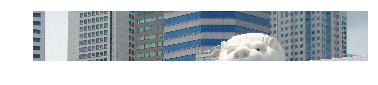

In [419]:
from matplotlib import pyplot as plt
plt.imshow(tensor[0: 500: 1][:])
plt.axis('off')
plt.show()

### Slices are views, not copies

Changes the main array

In [147]:
R2 = R[0][1:2:1] # same as R[0, 1:2:1]
R2

array([[ 1.7826087 ,  2.17391304]])

In [150]:
R2[0] = 0
R2

array([[ 0.,  0.]])

In [151]:
R

array([[[  1.        ,   1.39130435],
        [  0.        ,   0.        ],
        [  2.56521739,   2.95652174]],

       [[  3.34782609,   3.73913043],
        [  4.13043478,   4.52173913],
        [  4.91304348,   5.30434783]],

       [[  5.69565217,   6.08695652],
        [  6.47826087,   6.86956522],
        [  7.26086957,   7.65217391]],

       [[  8.04347826,   8.43478261],
        [  8.82608696,   9.2173913 ],
        [  9.60869565,  10.        ]]])

### Transposing

In [ ]:
R.T

In [ ]:
R.T.shape

### Sorting

# import pandas as pd

## Workshop: Pandas and Data Transformation

In [300]:
# data source: https://www.exchangerates.org.uk
sgd_cny = pd.read_csv('data/sgd_cny_rates_daily.csv',
                     parse_dates=True, index_col=0, infer_datetime_format=True,
                     squeeze=True)
print('First 5 entries:')
sgd_cny.head(5)

First 5 entries:


Date
2018-05-27    4.7499
2018-05-26    4.7620
2018-05-25    4.7610
2018-05-24    4.7618
2018-05-23    4.7553
Name: Singapore Dollar to Chinese Yuan, dtype: float64

In [220]:
df_all = pd.DataFrame(df)
df_all.join(df_rmb).dropna()


,exchange_rate_usd,Singapore Dollar to Chinese Yuan
2009-10-06,1.4046,4.8734
2009-10-07,1.4031,4.8754
2009-10-08,1.3949,4.9082
2009-10-09,1.3918,4.9039
2009-10-12,1.4014,4.8791
2009-10-13,1.3972,4.8871
2009-10-14,1.3939,4.9050
2009-10-15,1.3861,4.9157
2009-10-16,1.3884,4.9051
2009-10-19,1.3953,4.9037


# import matplotlib.pyplot as plt

## Workshop: Matplotlib and Data Visualization

# Putting everything together

## Workshop: Data Workflow

## Assessment 1: Data Workflow